# Step 1: Import Necessary Libraries

In [189]:
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Step 2: Load and Prepare the Data

## Load the JSON data

In [190]:
# Load the dataset
df = pd.read_json('istanbul_emlakjet_all_records_clean.json')

# Display the first few rows of the DataFrame
df.head()


,id,categoryTypeName,tradeTypeName,estateTypeName,title,url,images,locationSummary,quickInfos,priceDetail,description,info,location
0,14869600,konut,satılık,yazlık,satılık 4+1 bahçe katı yazlık daire,https://imaj.emlakjet.com/ilan/satilik-41-bahc...,[https://imaj.emlakjet.com/listing/14869600/74...,adalar - kınalıada mahallesi,Oda Sayısı: 4+1; Bulunduğu Kat: Bahçe katı,"{'trendType': None, 'previousCurrency': None, ...",tekinay'da satılık 4+1 bahçe katı yazlık daire...,"{'id': '14869600', 'created_at': '2024-03-17',...","{'summary': 'Adalar - Kınalıada Mahallesi', 'c..."
1,14794365,konut,satılık,daire,büyükada i̇do i̇skelesine yakın konumda 3+1 bl...,https://imaj.emlakjet.com/ilan/buyukada-ido-is...,[https://imaj.emlakjet.com/listing/14794365/4E...,adalar - nizam mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: Düz Giriş (Zemin),"{'trendType': None, 'previousCurrency': None, ...",mega emlak'tan \n\nbüyükada yi̇rmi̇üç ni̇san c...,"{'id': '14794365', 'created_at': '2024-03-02',...","{'summary': 'Adalar - Nizam Mahallesi', 'city'..."
2,14780556,konut,satılık,daire,heybeliada muhteşem deniz manzaralı sahile yak...,https://imaj.emlakjet.com/ilan/heybeliada-muht...,[https://imaj.emlakjet.com/listing/14780556/1F...,adalar - heybeliada mahallesi,Oda Sayısı: 4+1; Bulunduğu Kat: 4. Kat,"{'trendType': None, 'previousCurrency': None, ...",heybeliada’da tamamen yenilenmiş deniz manzara...,"{'id': '14780556', 'created_at': '2024-02-28',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."
3,14780555,konut,satılık,daire,adalar heybeliada’da satılık 3+1 kat mülkiyetli,https://imaj.emlakjet.com/ilan/adalar-heybelia...,[https://imaj.emlakjet.com/listing/14780555/28...,adalar - heybeliada mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: 3. Kat,"{'trendType': None, 'previousCurrency': None, ...",heybeliada’da satılık 3+1kat mülkiyetli\n\nhey...,"{'id': '14780555', 'created_at': '2024-02-28',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."
4,14771773,konut,satılık,yalı,prenses adalari heybeli̇de muhteşem deni̇z yal...,https://imaj.emlakjet.com/ilan/prenses-adalari...,[https://imaj.emlakjet.com/listing/14771773/BD...,adalar - heybeliada mahallesi,Oda Sayısı: 9+ Oda,"{'trendType': None, 'previousCurrency': None, ...",-prenses adalari heybeli̇ adada\n\n250 m2 araz...,"{'id': '14771773', 'created_at': '2024-02-27',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."


## Data Preparation

In [191]:
print(df.columns)

Index(['id', 'categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title',
       'url', 'images', 'locationSummary', 'quickInfos', 'priceDetail',
       'description', 'info', 'location'],
      dtype='object')


In [192]:
if 'priceDetail' in df.columns:
    price_details = pd.json_normalize(df['priceDetail'])
    df = pd.concat([df.drop(['priceDetail'], axis=1), price_details], axis=1)

if 'info' in df.columns:
    info_details = pd.json_normalize(df['info'])
    df = pd.concat([df.drop(['info'], axis=1), info_details], axis=1)


In [193]:
print(df.columns)

Index(['id', 'categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title',
       'url', 'images', 'locationSummary', 'quickInfos', 'description',
       'location', 'trendType', 'previousCurrency', 'previousPrice',
       'previousValueValid', 'currency', 'price', 'tlPrice',
       'alternativeValue', 'firstPrice', 'differenceRate', 'squareMeterPrice',
       'opportunity', 'id', 'created_at', 'updated_at', 'category',
       'trade_type', 'net_square', 'gross_square', 'room_count', 'build_age',
       'floor_number', 'floor_count', 'heating_type', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_status', 'build_type', 'deed_status', 'mortgage_status',
       'furniture_status', 'subscription_price', 'loan_price', 'trade',
       'bath_count', 'square_of_bath', 'balcony_condition', 'balcony_count',
       'balcony_type', 'square_of_balcony', 'square_of_room', 'wc_count',
       'square_of_wc', 'block_of_buildings', 'sheet', 'parcel_o

In [194]:
# Display the data types of each column
print(df.dtypes)


id                   int64
categoryTypeName    object
tradeTypeName       object
estateTypeName      object
title               object
                     ...  
parcel_of_land      object
show_unit_price     object
video_navigable     object
ground_survey       object
flat_per_floor      object
Length: 63, dtype: object


In [195]:
# Print out numerical features
numerical_features = df.select_dtypes(include='number').columns
print(numerical_features)


Index(['id', 'previousPrice', 'price', 'tlPrice', 'firstPrice',
       'differenceRate', 'squareMeterPrice', 'net_square', 'gross_square'],
      dtype='object')


In [196]:
# Check for duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)


Duplicate columns found: Index(['id'], dtype='object')


In [197]:
# Drop the duplicate column
df.drop(columns=['id'], inplace=True)


In [198]:
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)

In [199]:
print(df.columns)


Index(['categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title', 'url',
       'images', 'locationSummary', 'quickInfos', 'description', 'location',
       'trendType', 'previousCurrency', 'previousPrice', 'previousValueValid',
       'currency', 'price', 'tlPrice', 'alternativeValue', 'firstPrice',
       'differenceRate', 'squareMeterPrice', 'opportunity', 'created_at',
       'updated_at', 'category', 'trade_type', 'net_square', 'gross_square',
       'room_count', 'build_age', 'floor_number', 'floor_count',
       'heating_type', 'usability', 'suitability_for_credit',
       'suitability_for_investor', 'in_site', 'build_status', 'build_type',
       'deed_status', 'mortgage_status', 'furniture_status',
       'subscription_price', 'loan_price', 'trade', 'bath_count',
       'square_of_bath', 'balcony_condition', 'balcony_count', 'balcony_type',
       'square_of_balcony', 'square_of_room', 'wc_count', 'square_of_wc',
       'block_of_buildings', 'sheet', 'parcel_of_land', 'sh

In [200]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Flatten nested lists in DataFrame
def flatten_nested_lists(df):
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x[0] if isinstance(x, list) else x)
    return df

df = flatten_nested_lists(df)

def flatten_nested_dicts(df):
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, dict)).all():
            df[col] = df[col].apply(lambda x: list(x.values())[0])
    return df

df = flatten_nested_dicts(df)



# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define which columns are numerical and categorical
numerical_features = df.select_dtypes(include='number').columns
categorical_features = df.select_dtypes(include='object').columns

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
processed_data = preprocessor.fit_transform(df)

# Convert the processed data back to a DataFrame
processed_df = pd.DataFrame(processed_data)


# Step 3: Further Data Cleaning, Preprocessing

In [203]:
# Filling missing values for numerical features with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.mean()))

# For categorical features, fill missing values with the mode (most common value)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [204]:
# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['categoryTypeName', 'estateTypeName'], drop_first=True)


In [205]:
import pandas as pd
import re

df['build_age'] = df['build_age'].apply(lambda x: int(re.findall('\d+', x)[0]) if pd.notnull(x) else x)



In [207]:
# Function to convert room_count like "4+1" into an integer by summing the parts
def convert_room_count_to_int(room_count):
    if pd.isnull(room_count):
        return None  # Handle missing values
    parts = room_count.split('+')
    try:
        # Convert each part to integer and sum them
        return sum(int(part) for part in parts)
    except ValueError:
        # Handle edge cases where conversion to integer might fail
        return None

df['room_count'] = df['room_count'].apply(convert_room_count_to_int)


In [209]:
df.columns

Index(['tradeTypeName', 'title', 'url', 'images', 'locationSummary',
       'quickInfos', 'description', 'location', 'trendType',
       'previousCurrency', 'previousPrice', 'previousValueValid', 'currency',
       'price', 'tlPrice', 'alternativeValue', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'opportunity', 'created_at', 'updated_at',
       'category', 'trade_type', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count', 'heating_type', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_status', 'build_type', 'deed_status', 'mortgage_status',
       'furniture_status', 'subscription_price', 'loan_price', 'trade',
       'bath_count', 'square_of_bath', 'balcony_condition', 'balcony_count',
       'balcony_type', 'square_of_balcony', 'square_of_room', 'wc_count',
       'square_of_wc', 'block_of_buildings', 'sheet', 'parcel_of_land',
       'show_unit_price', 'video_navigable', 'gr

In [211]:
# Function to extract number from strings for 'floor_number' and 'floor_count'
def extract_number_from_string(s):
    # If the string is 'ground floor' or similar, return 0
    if pd.isnull(s):
        return None
    if 'ground' in s.lower():
        return 0
    # Extract number from string
    nums = re.findall('\d+', s)
    return int(nums[0]) if nums else None

# Apply the function to the 'floor_number' and 'floor_count' columns
df['floor_number'] = df['floor_number'].apply(extract_number_from_string)
df['floor_count'] = df['floor_count'].apply(extract_number_from_string)

df['floor_count'] = df['floor_count'].fillna(df['floor_count'].median())


In [212]:
# Apply One-Hot Encoding to 'heating_type' and 'build_status'
df = pd.get_dummies(df, columns=['heating_type', 'build_status'], drop_first=False)



In [213]:
df.columns

Index(['tradeTypeName', 'title', 'url', 'images', 'locationSummary',
       'quickInfos', 'description', 'location', 'trendType',
       'previousCurrency', 'previousPrice', 'previousValueValid', 'currency',
       'price', 'tlPrice', 'alternativeValue', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'opportunity', 'created_at', 'updated_at',
       'category', 'trade_type', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_type', 'deed_status', 'mortgage_status', 'furniture_status',
       'subscription_price', 'loan_price', 'trade', 'bath_count',
       'square_of_bath', 'balcony_condition', 'balcony_count', 'balcony_type',
       'square_of_balcony', 'square_of_room', 'wc_count', 'square_of_wc',
       'block_of_buildings', 'sheet', 'parcel_of_land', 'show_unit_price',
       'video_navigable', 'ground_survey', 'flat_per_floor',


In [237]:
# Print out numerical features
numerical_features = df.select_dtypes(include='number').columns
print(numerical_features)


Index(['previousPrice', 'price', 'tlPrice', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count', 'estateTypeName_daire',
       'estateTypeName_dağ evi', 'estateTypeName_kooperatif',
       'estateTypeName_köy evi', 'estateTypeName_köşk',
       'estateTypeName_müstakil ev', 'estateTypeName_prefabrik',
       'estateTypeName_residence', 'estateTypeName_villa',
       'estateTypeName_yalı', 'estateTypeName_yalı dairesi',
       'estateTypeName_yazlık', 'estateTypeName_çiftlik evi',
       'heating_type_Doğalgaz Sobalı', 'heating_type_Elektrikli Radyatör',
       'heating_type_Fancoil Ünitesi', 'heating_type_Güneş Enerjisi',
       'heating_type_Isı Pompası', 'heating_type_Isıtma Yok',
       'heating_type_Jeotermal', 'heating_type_Kat Kaloriferi',
       'heating_type_Klimalı', 'heating_type_Kombi Doğalgaz',
       'heating_type_Kombi Fueloil', 'heating_type_Kombi Katı Yakıt',
       'he

# Step 4: Feature Engineering

In [238]:
# Define the features and target variable
features = ['previousPrice', 'differenceRate',
            'squareMeterPrice', 'net_square', 'gross_square', 'room_count',
            'build_age', 'floor_number', 'floor_count',
            'estateTypeName_daire', 'estateTypeName_dağ evi', 'estateTypeName_kooperatif',
            'estateTypeName_köy evi', 'estateTypeName_köşk',
            'estateTypeName_müstakil ev', 'estateTypeName_prefabrik',
            'estateTypeName_residence', 'estateTypeName_villa',
            'estateTypeName_yalı', 'estateTypeName_yalı dairesi',
            'estateTypeName_yazlık', 'estateTypeName_çiftlik evi',
            'heating_type_Doğalgaz Sobalı', 'heating_type_Elektrikli Radyatör',
            'heating_type_Fancoil Ünitesi', 'heating_type_Güneş Enerjisi',
            'heating_type_Isı Pompası', 'heating_type_Isıtma Yok',
            'heating_type_Jeotermal', 'heating_type_Kat Kaloriferi',
            'heating_type_Klimalı', 'heating_type_Kombi Doğalgaz',
            'heating_type_Kombi Fueloil', 'heating_type_Kombi Katı Yakıt',
            'heating_type_Merkezi (Pay Ölçer)', 'heating_type_Merkezi Doğalgaz',
            'heating_type_Merkezi Fueloil', 'heating_type_Merkezi Kömür',
            'heating_type_Sobalı', 'heating_type_VRV', 'heating_type_Yerden Isıtma',
            'heating_type_Şömine', 'build_status_Sıfır',
            'build_status_Yapım Aşamasında', 'build_status_İkinci El']
target = 'price'

# Calculate the Interquartile Range (IQR) for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Predict on the
X = df[features]
y = df[target]

X = X.fillna(X.median())


# Step 5: Training and Testing Data

In [239]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² score: {r2}')


RMSE: 1365774.7679049126
R² score: 0.3219410541133776


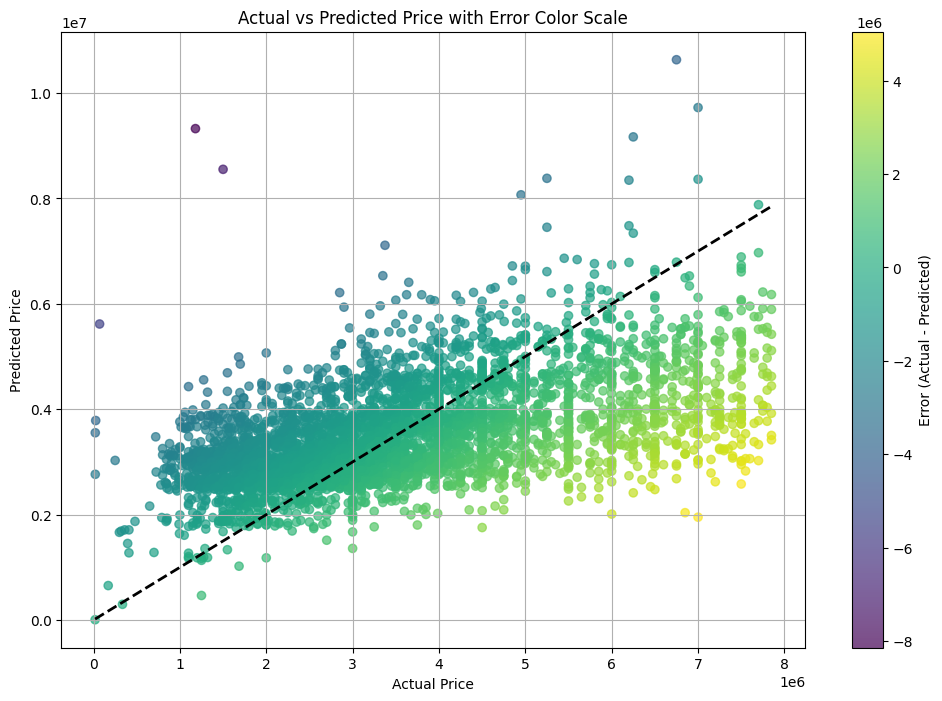

In [243]:
import numpy as np

# Calculate errors
errors = y_test - y_pred

# Plotting Actual vs Predicted prices with error color scale
plt.figure(figsize=(12, 8))
sc = plt.scatter(y_test, y_pred, alpha=0.7, c=errors)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price with Error Color Scale')
plt.colorbar(sc, label='Error (Actual - Predicted)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.show()


In [247]:
# Calculate the difference between predicted and actual prices
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predictions['Difference'] = df_predictions['Predicted'] - df_predictions['Actual']

df_predictions_sorted = df_predictions.sort_values(by='Difference', ascending=False)

# Get the top listings with the highest predicted-actual difference
top_listings = df_predictions_sorted.head()

# Retrieve the indices of the top listings with the highest differences
top_listings_indices = top_listings.index

full_details_top_listings = df.loc[top_listings_indices]

print(full_details_top_listings)



      tradeTypeName                                              title  \
10874       satılık  esenyurt osmangazi̇ mahallesi̇nde uygun fi̇yat...   
12158       satılık  eyüpsultan yeşilpınar bölgeleri kat karşılığı ...   
22500       satılık  maslak ağaoğlu 1453 2.5+1 sifir lüx eşyali ki̇...   
16564       satılık  sahi̇bi̇nden (dubleks hariç 3 adet daire fi̇ya...   
27984       satılık  cevi̇zli̇bağ si̇te i̇çeri̇si̇ deprem* sonrasi ...   

                                                     url  \
10874  https://imaj.emlakjet.com/ilan/esenyurt-osmang...   
12158  https://imaj.emlakjet.com/ilan/eyupsultan-yesi...   
22500  https://imaj.emlakjet.com/ilan/maslak-agaoglu-...   
16564  https://imaj.emlakjet.com/ilan/sahibinden-dubl...   
27984  https://imaj.emlakjet.com/ilan/cevizlibag-site...   

                                                  images  \
10874  https://imaj.emlakjet.com/listing/14857063/26C...   
12158  https://imaj.emlakjet.com/listing/14693966/3AC...   
22500  https:/